## Guia da Camada Física
##### O documento tem o objetivo de demostrar o funcionamento da camada física, além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random

##### Será definida a topologia de Grade na rede.

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


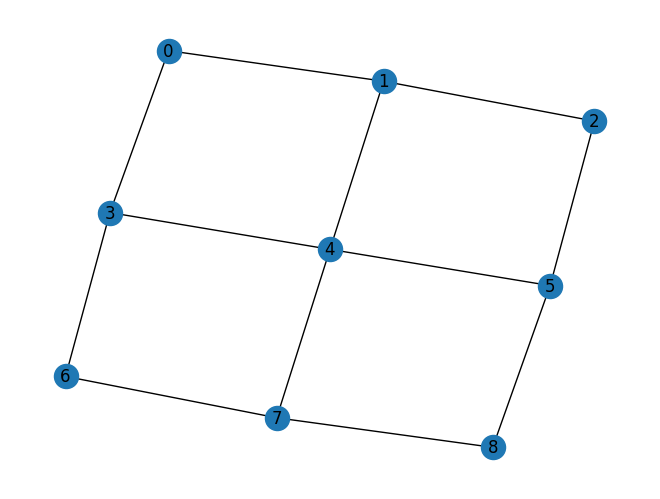

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()
Logger.activate(Logger)

##### Selecionando aleatoriamente uma aresta do grafo da rede e deseguinando quem será Alice e Bob.

In [3]:
arestas = list(rede.edges)
aresta_aleatorias = random.sample(arestas, 1)[0]
x,y = aresta_aleatorias

alice = rede.get_host(x)
bob = rede.get_host(y)

##### Adicionando qubits aos hosts.

In [4]:
h1 = Qubit(1)
h2 = Qubit(2)

alice.add_qubit(h1)
bob.add_qubit(h2)

2024-11-17 15:11:35,969: Qubit 1 adicionado à memória do Host 0.
2024-11-17 15:11:35,972: Qubit 2 adicionado à memória do Host 3.


##### Acessando a memória dos Hosts.

In [5]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x000001EF8D1AFDA0>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D818A70>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D1AF590>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D1AF3E0>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D8728A0>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D872870>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D872840>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D8726C0>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D8728D0>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D872900>, <quantumnet.objects.qubit.Qubit object at 0x000001EF95902060>]
[<quantumnet.objects.qubit.Qubit object at 0x000001EF8D872F00>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D872F60>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D872FC0>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8D873020>, <quantumnet.objects.qubit.Qubit object at 0x000001EF8

##### Obtendo o útimo qubit de um dos hosts.

In [6]:
qub1 = alice.get_last_qubit()

##### Medindo a fidelidade entre dois qubits.


In [7]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-11-17 15:11:36,067: A fidelidade do qubit Qubit 1 with state 0 é 0.9387129371995464
2024-11-17 15:11:36,069: A fidelidade do qubit Qubit 2 with state 0 é 0.006058658578162235
2024-11-17 15:11:36,072: A fidelidade entre o qubit 0.9387129371995464 e o qubit 0.006058658578162235 é 0.005687341189395899


0.005687341189395899

##### Medindo a fidelidade de um qubit.


In [8]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-11-17 15:11:36,124: A fidelidade do qubit Qubit 1 with state 0 é 0.9387129371995464


0.9387129371995464

##### Protocolo de criação de entrelaçamento entre dois qubits.

In [9]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-11-17 15:11:36,155: Timeslot 1: Par epr criado com fidelidade 0.0021681332535335293
2024-11-17 15:11:36,157: Timeslot 2: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

##### Reavaliando a fidelidade de um qubit para comparar suas variações após a passagem de um timeslot.


In [10]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)


2024-11-17 15:11:36,192: A fidelidade do qubit Qubit 1 with state 0 é 0.9293258078275509


0.9293258078275509

##### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP.

In [11]:
rede.physical.echp_on_demand(2,5)

2024-11-17 15:11:36,240: A fidelidade do qubit Qubit 29 with state 0 é 0.023554676743464
2024-11-17 15:11:36,242: A fidelidade do qubit Qubit 59 with state 0 é 0.4734648980026847
2024-11-17 15:11:36,245: Timeslot 3: A probabilidade de sucesso do ECHP falhou.


False

##### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP.

In [12]:
rede.physical.echp_on_replay(2,5)

2024-11-17 15:11:36,281: A fidelidade do qubit Qubit 28 with state 0 é 0.09148932483485271
2024-11-17 15:11:36,284: A fidelidade do qubit Qubit 58 with state 0 é 0.45947511073035396
2024-11-17 15:11:36,285: Timeslot 4: A probabilidade de sucesso do ECHP falhou.


False

##### A função get_total_useds_qubits, será usada para mostrar quantos qubits foram usados na camada Física.

In [13]:
rede.get_total_useds_qubits()

2024-11-17 15:11:36,339: Qubits usados na camada PhysicalLayer: 6
2024-11-17 15:11:36,341: Qubits usados na camada LinkLayer: 0
2024-11-17 15:11:36,342: Qubits usados na camada TransportLayer: 0
2024-11-17 15:11:36,344: Qubits usados na camada ApplicationLayer: 0


6

##### Nesta função, get_total_used_erps, será calculado a quantidade de pares EPRs usados na camada Física.

In [14]:
rede.get_total_useds_eprs()

2024-11-17 15:11:36,411: Eprs usados na camada PhysicalLayer: 1
2024-11-17 15:11:36,413: Eprs usados na camada LinkLayer: 0
2024-11-17 15:11:36,415: Eprs usados na camada NetworkLayer: 0


1

##### Acessando o canal que mostra as probablidades e os pares eprs.


In [15]:
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.551735014674803,
 'prob_replay_epr_create': 0.39309380006114475,
 'eprs': [<quantumnet.objects.epr.Epr at 0x1ef8d8a8aa0>,
  <quantumnet.objects.epr.Epr at 0x1ef8d8a8e00>]}

##### Acessando o dicionario que contém os pares eprs alocados.


In [16]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x1ef8d8a8050>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x1ef8d8a8200>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x1ef8d8a83e0>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x1ef8d8a86e0>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x1ef8d8a8aa0>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x1ef8d8a8e60>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x1ef8d8a9220>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x1ef8d8a95e0>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x1ef8d8a99a0>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x1ef8d8a9d60>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x1ef8d8aa120>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x1ef8d8aa4e0>,
  <quantumnet.objects.epr.Epr at 0x1ef8d8aa840>]}

##### A função get_timeslot apresenta quantos timeslot se passaram durante a execução da camada.

In [17]:
rede.get_timeslot()

4

In [18]:
rede.display_all_qubit_timeslots()

Qubit 0 foi criado no timeslot 0 na camada Physical Layer
Qubit 1 foi criado no timeslot 0 na camada Physical Layer
Qubit 2 foi criado no timeslot 0 na camada Physical Layer
Qubit 3 foi criado no timeslot 0 na camada Physical Layer
Qubit 4 foi criado no timeslot 0 na camada Physical Layer
Qubit 5 foi criado no timeslot 0 na camada Physical Layer
Qubit 6 foi criado no timeslot 0 na camada Physical Layer
Qubit 7 foi criado no timeslot 0 na camada Physical Layer
Qubit 8 foi criado no timeslot 0 na camada Physical Layer
Qubit 9 foi criado no timeslot 0 na camada Physical Layer
Qubit 10 foi criado no timeslot 0 na camada Physical Layer
Qubit 11 foi criado no timeslot 0 na camada Physical Layer
Qubit 12 foi criado no timeslot 0 na camada Physical Layer
Qubit 13 foi criado no timeslot 0 na camada Physical Layer
Qubit 14 foi criado no timeslot 0 na camada Physical Layer
Qubit 15 foi criado no timeslot 0 na camada Physical Layer
Qubit 16 foi criado no timeslot 0 na camada Physical Layer
Qubit 1